<a href="https://colab.research.google.com/github/sanjanams742/sanjanams742/blob/main/big_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:  Big Sales Prediction using Random Forest Regressor**

Get Understanding about Data set
There are 12 variables in dataset:
Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Outlet_Sales

Import Library

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Big%20Sales%20Data.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [55]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('median'), inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13710 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            13710 non-null  object 
 1   Item_Weight                13710 non-null  float64
 2   Item_Fat_Content           13710 non-null  int64  
 3   Item_Visibility            13710 non-null  float64
 4   Item_Type                  13710 non-null  int64  
 5   Item_MRP                   13710 non-null  float64
 6   Outlet_Identifier          13710 non-null  int64  
 7   Outlet_Establishment_Year  13710 non-null  int64  
 8   Outlet_Size                13710 non-null  int64  
 9   Outlet_Location_Type       13710 non-null  int64  
 10  Outlet_Type                13710 non-null  int64  
 11  Item_Outlet_Sales          13710 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.4+ MB


In [57]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,13710.000000,13710.000000,13710.000000,13710.000000,13710.000000,13710.000000,13710.000000,13710.000000,13710.000000,13710.000000,13710.000000
mean,12.740015,0.354121,0.066720,0.208972,138.595763,4.201969,1998.082057,0.604887,1.099708,1.169584,1974.582733
std,4.291127,0.478264,0.051669,0.452926,61.337782,2.680928,8.254119,0.488893,0.811270,0.765947,1334.159703
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.195000,0.000000,0.027707,0.000000,92.643600,2.000000,1987.000000,0.000000,0.000000,1.000000,890.840400
50%,12.350000,0.000000,0.054616,0.000000,138.683800,4.000000,1999.000000,1.000000,1.000000,1.000000,1705.779600
75%,16.100000,1.000000,0.095273,0.000000,183.352900,6.000000,2004.000000,1.000000,2.000000,1.000000,2826.986800
max,30.000000,1.000000,0.328391,2.000000,266.888400,9.000000,2009.000000,1.000000,2.000000,3.000000,5835.189665


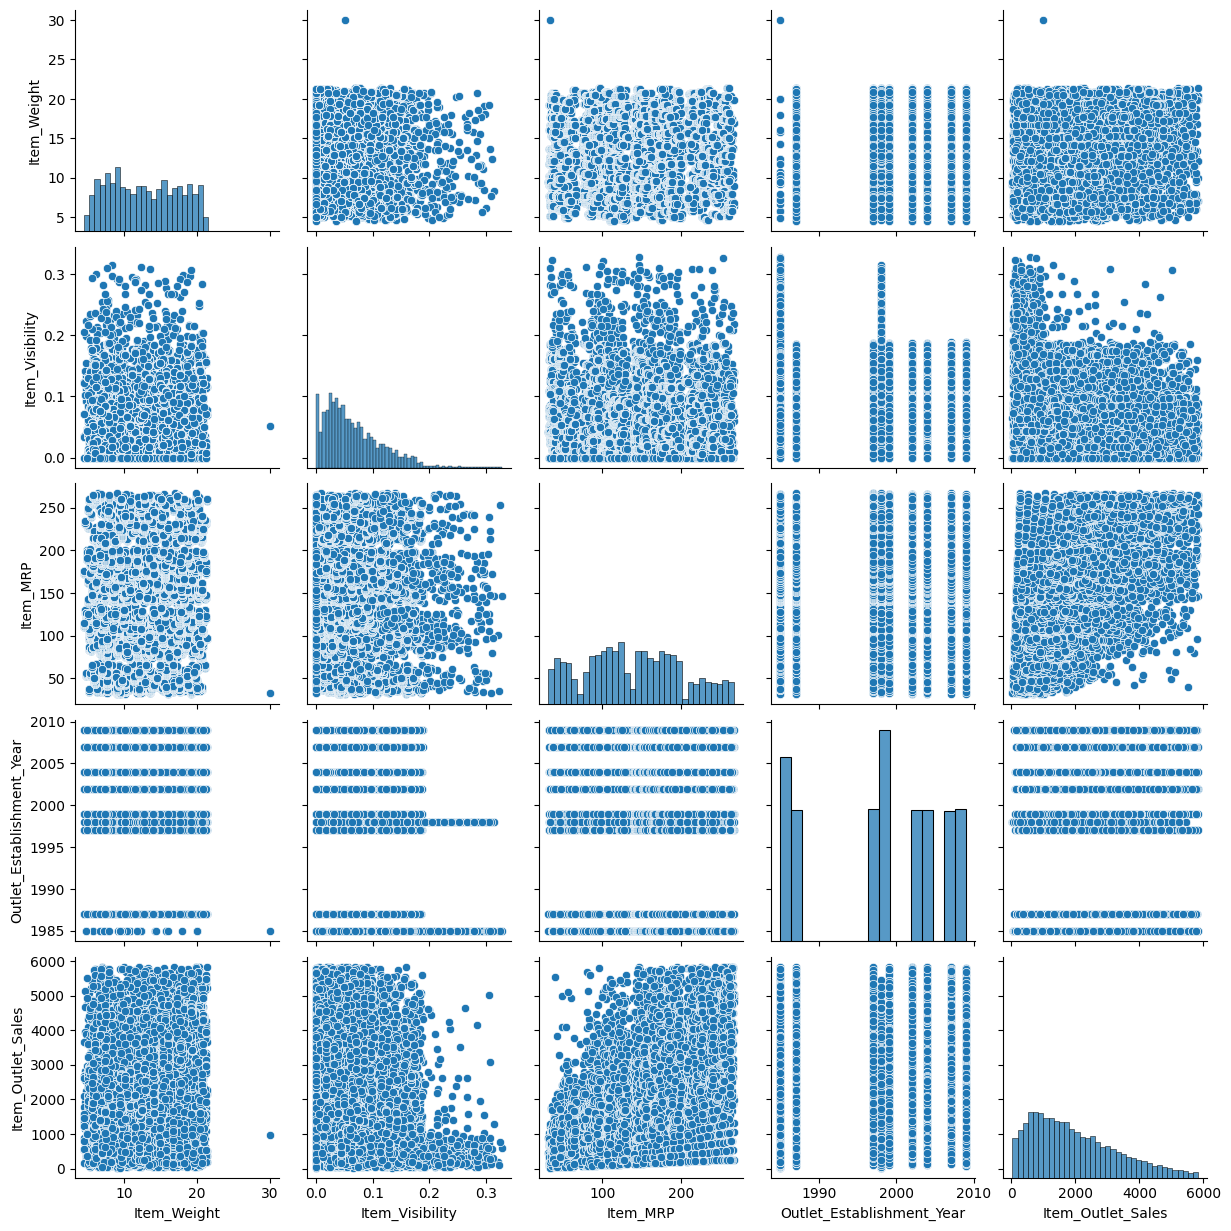

In [8]:
from scipy import stats
df = df[np.abs(stats.zscore(df['Item_Outlet_Sales'])) < 2]
# pair plot
import seaborn as sns
sns.pairplot(df)

In [9]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDD58              10
FDD56              10
FDD53              10
FDY36              10
                   ..
FDC02               5
FDY55               5
NCL42               5
FDT21               5
FDA15               3
Name: count, Length: 1559, dtype: int64

In [10]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8173
Regular             4665
LF                   512
reg                  190
low fat              170
Name: count, dtype: int64

In [58]:
df.replace({'Item_Fat_Content': {'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'}}, inplace=True)


In [59]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   8855
1                   4855
Name: count, dtype: int64

In [60]:
df.replace({'Item_Fat_Content': {'Low Fat': 0,'Regular' : 1}}, inplace=True)
df[['Item_Type']].value_counts()

Item_Type
0            11118
1             2319
2              273
Name: count, dtype: int64

In [15]:
df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,
                         'Frozen Foods' : 0, 'Dairy' : 0, 'Baking Goods' : 0,
                         'Canned' : 0, 'Health and Hygiene' : 1,
                         'Meat' : 0, 'Soft Drinks' : 0, 'Breads' : 0, 'Hard Drinks' : 0,
                         'Others' : 2,'Starchy Foods' : 0, 'Breakfast' : 0, 'Seafood' : 0
                         }},inplace=True)
df[['Item_Type']].value_counts()

Item_Type
0            11118
1             2319
2              273
Name: count, dtype: int64

In [16]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT018               1529
OUT046               1529
OUT013               1525
OUT045               1523
OUT049               1520
OUT035               1517
OUT017               1511
OUT027               1284
OUT010                925
OUT019                847
Name: count, dtype: int64

In [17]:
df.replace({'Outlet_Identifier':{'OUT027': 0,'OUT013': 1,
                         'OUT049' : 2, 'OUT046' : 3, 'OUT035' : 4,
                         'OUT045' : 5, 'OUT018' : 6,
                         'OUT017' : 7, 'OUT010' : 8, 'OUT019' : 9,
                         }},inplace=True)
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
3                    1529
6                    1529
1                    1525
5                    1523
2                    1520
4                    1517
7                    1511
0                    1284
8                     925
9                     847
Name: count, dtype: int64

In [18]:
df[['Outlet_Size']].value_counts()

Outlet_Size
Medium         6768
Small          5417
High           1525
Name: count, dtype: int64

In [19]:
df.replace({'Outlet_Size': {'Small': 0,'Medium' : 1, 'High' : 1}}, inplace=True)
df[['Outlet_Size']].value_counts()

Outlet_Size
1              8293
0              5417
Name: count, dtype: int64

In [20]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5263
Tier 2                  4551
Tier 1                  3896
Name: count, dtype: int64

In [21]:
df.replace({'Outlet_Location_Type': {'Tier 1': 0,'Tier 2' : 1, 'Tier 3' : 2}}, inplace=True)
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5263
1                       4551
0                       3896
Name: count, dtype: int64

In [22]:
df[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9125
Grocery Store        1772
Supermarket Type2    1529
Supermarket Type3    1284
Name: count, dtype: int64

In [23]:
df.replace({'Outlet_Type': {'Grocery Store': 0,'Supermarket Type1' : 1, 'Supermarket Type2' : 2, 'Supermarket Type3': 3}}, inplace=True)
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9125
0              1772
2              1529
3              1284
Name: count, dtype: int64

In [24]:
df.describe().corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,0.999998,0.999998,0.999998,0.999911,0.999999,0.986938,0.999998,0.999998,0.999998,0.922348
Item_Fat_Content,0.999998,1.000000,1.000000,1.000000,0.999885,1.000000,0.986804,1.000000,1.000000,1.000000,0.921632
Item_Visibility,0.999998,1.000000,1.000000,1.000000,0.999884,1.000000,0.986805,1.000000,1.000000,1.000000,0.921613
Item_Type,0.999998,1.000000,1.000000,1.000000,0.999885,1.000000,0.986804,1.000000,1.000000,1.000000,0.921652
Item_MRP,0.999911,0.999885,0.999884,0.999885,1.000000,0.999892,0.987665,0.999885,0.999886,0.999886,0.927151
Outlet_Identifier,0.999999,1.000000,1.000000,1.000000,0.999892,1.000000,0.986823,1.000000,1.000000,1.000000,0.921815
Outlet_Establishment_Year,0.986938,0.986804,0.986805,0.986804,0.987665,0.986823,1.000000,0.986806,0.986807,0.986810,0.921226
Outlet_Size,0.999998,1.000000,1.000000,1.000000,0.999885,1.000000,0.986806,1.000000,1.000000,1.000000,0.921629
Outlet_Location_Type,0.999998,1.000000,1.000000,1.000000,0.999886,1.000000,0.986807,1.000000,1.000000,1.000000,0.921657
Outlet_Type,0.999998,1.000000,1.000000,1.000000,0.999886,1.000000,0.986810,1.000000,1.000000,1.000000,0.921669


In [61]:
y = df['Item_Outlet_Sales']
X = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]




In [62]:
X = df.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis=1)

In [63]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10968, 10), (2742, 10), (10968,), (2742,))

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rfr = RandomForestRegressor()

In [66]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
#Get Model Prediction
y_pred = rfr.predict(X_test)
#Get Model Evaluation
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

695.7248390349289

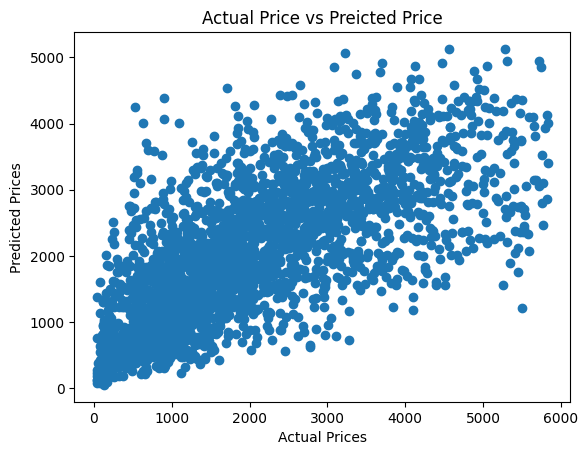

In [69]:
#Get Visualization of Actual Vs Predicted Results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()